# Data set information
Churn Prediction involves identifying customers who are inclined to terminate their subscription to a service. Although initially associated with large telecommunications corporations, this concept pertains to businesses of all scales, including startups. Nowadays, thanks to predictive services and APIs, predictive analytics are accessible beyond just major players with the resources to employ teams of data scientists.​

**Objective​**
- To fit dataset to relevant classification models.​
- To compare classification models and select model.​
- To tune hyper parameters of selected model to improve key performance indicators.

# **Importing packages and file**

The list of the necessary libraries ​

**Including:**
- Standard libraries for data analysis​
- sklearn modules for data preprocessing​
- sklearn modules for Model Selection​
- sklearn modules for Model Evaluation & Improvement​
- Standard libraries for data visualization​
- Miscellaneous Utilitiy Libraries

In [ ]:

# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import time


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
from pprint import pprint



In [ ]:
train = pd.read_csv('cell2celltrain.csv')

# **EDA**
Exploration Data Analysis
- Explore data and columns​
- Check for missing data​
- Drop unimportant columns​
- Imputation​
- Encoding of variables​

In [ ]:
train.shape

(51047, 58)

In [ ]:
train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
#drop Columns with more than 50% NULL values
#unimportant columns which not provide any meaningful information for the analysis or modeling task at hand.
#Keeping irrelevant features can add noise and unnecessary complexity to the model.​

train.drop(columns=['MadeCallToRetentionTeam',
'OwnsMotorcycle',
'IncomeGroup',
'NonUSTravel',
'BuysViaMailOrder',
'TruckOwner',
'RVOwner',
'HandsetWebCapable',
'HandsetRefurbished',
'ChildrenInHH',
'CurrentEquipmentDays',
'AgeHH1',
'AgeHH2',
'ServiceArea'],inplace = True)

#**Encoding**

In [ ]:
# Create a dictionary to map original values to new values
occupation_mapping = {
    'Professional': 'Working',
    'Crafts': 'Working',
    'Self': 'Working',
    'Other': 'Working',
    'Homemaker': 'Working',
    'Clerical': 'Working',
    'Student': 'Student',
    'Retired': 'Retired',
}

# Apply the mapping to the 'occupation' column
train['occupation_encoded'] = train['Occupation'].map(occupation_mapping)

# Display the resulting DataFrame
train['occupation_encoded'].value_counts()

# Drop the original 'occupation' column
train.drop('Occupation', axis=1, inplace=True)

In [ ]:
# Perform one-hot encoding for the 'occupation' column
occupation = pd.get_dummies(train['occupation_encoded'], prefix='occupation')

occupation = occupation.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, occupation], axis=1)

train.drop('occupation_encoded', axis=1, inplace=True)

In [ ]:
# Create a mapping of text labels to numerical values
credit_mapping = {
    '1-Highest': 1,
    '2-High': 2,
    '3-Good': 3,
    '4-Medium': 4,
    '5-Low': 5,
    '6-VeryLow': 6,
    '7-Lowest': 7
}

# Map the text labels to numerical values
train['credit_rating'] = train['CreditRating'].map(credit_mapping)

# Display the resulting DataFrame
train['credit_rating'].value_counts()

train.drop('CreditRating', axis=1, inplace=True)

In [ ]:
# Create a mapping of text labels to numerical values
homeowner = {
        'Known': 1,
        'Unknown': 0,

}

# Map the text labels to numerical values
train['Homeownership'] = train['Homeownership'].map(homeowner)

# Display the resulting DataFrame
train['Homeownership'].value_counts()


1    33987
0    17060
Name: Homeownership, dtype: int64

In [ ]:
def encode_columns(dataframe, columns):
    label_mapping = {
        'Yes': 1,
        'No': 0,
    }

    for col in columns:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].map(label_mapping)

    return dataframe

# Columns to apply encoding
columns_to_encode = ['Churn', 'RespondsToMailOffers', 'OptOutMailings',
                     'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'MaritalStatus']

# Apply encoding function
encoded_train = encode_columns(train, columns_to_encode)


encoded_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,Homeownership,RespondsToMailOffers,OptOutMailings,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,PrizmCode,MaritalStatus,occupation_Retired,occupation_Student,occupation_Working,credit_rating
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,1,1,0,1,1,1,0,0,0,0,0,30,Suburban,0.0,0,0,1,1
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1,1,0,1,1,0,0,1,0,0,0,30,Suburban,1.0,0,0,1,4
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,0,0,0,0,1,0,0,1,0,0,0,Unknown,Town,1.0,0,0,1,3
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,1,1,0,0,1,0,0,1,0,0,0,10,Other,0.0,0,0,1,4
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,1,1,0,1,1,0,0,0,1,0,1,10,Other,1.0,0,0,1,1


#**Hot Encoding**
In this One Hot encoding method, each category in a categorical variable is represented by a binary vector. ​Each category is transformed into a binary vector of all zeros except for one position where a 1 is placed to indicate the presence of that category. ​This method ensures that no ordinal relationship is assumed between categories.​

In these sets we one hot edncoding: PrizmCode, MaritalStatus, and HandsetPrice

In [ ]:
# Perform one-hot encoding for the 'PrizmCode' column
prizm_dummies = pd.get_dummies(train['PrizmCode'], prefix='PrizmCode')

prizm_dummies = prizm_dummies.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, prizm_dummies], axis=1)

# Drop the original 'PrizmCode' column
train.drop('PrizmCode', axis=1, inplace=True)

In [ ]:
# Perform one-hot encoding for the 'Marital_Status' column
Marital_Status = pd.get_dummies(train['MaritalStatus'], prefix='occu')

Marital_Status = Marital_Status.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, Marital_Status], axis=1)

train.drop('MaritalStatus', axis=1, inplace=True)

In [ ]:
# Convert 'Unknown' values to NaN and convert the column to numeric
train['HandsetPrice'] = pd.to_numeric(train['HandsetPrice'], errors='coerce')

# Calculate the mean of the column excluding NaN values
mean_handset_price = train['HandsetPrice'].mean()

# Replace NaN values with the calculated mean
train['HandsetPrice'].fillna(mean_handset_price, inplace=True)

In [ ]:
  # Ratio of 0 and 1s per column
for col in train.columns[1:]:
    value_counts = train[col].value_counts()
    sorted_value_counts = value_counts.reindex([0, 1])

    total_values = sorted_value_counts.sum()
    percentages = sorted_value_counts / total_values * 100

    print(percentages)
    print('----------------------------')

0    71.18146
1    28.81854
Name: Churn, dtype: float64
----------------------------
0    100.0
1      NaN
Name: MonthlyRevenue, dtype: float64
----------------------------
0    87.21351
1    12.78649
Name: MonthlyMinutes, dtype: float64
----------------------------
0    99.378882
1     0.621118
Name: TotalRecurringCharge, dtype: float64
----------------------------
0    100.0
1      NaN
Name: DirectorAssistedCalls, dtype: float64
----------------------------
0    95.807249
1     4.192751
Name: OverageMinutes, dtype: float64
----------------------------
0    98.977569
1     1.022431
Name: RoamingCalls, dtype: float64
----------------------------
0    83.197631
1    16.802369
Name: PercChangeMinutes, dtype: float64
----------------------------
0    96.468247
1     3.531753
Name: PercChangeRevenues, dtype: float64
----------------------------
0    77.163941
1    22.836059
Name: DroppedCalls, dtype: float64
----------------------------
0    82.426828
1    17.573172
Name: BlockedCalls, dty

In [ ]:
# Count of 0 and 1s per column
for col in train.columns[1:]:
    value_counts = train[col].value_counts()
    sorted_value_counts = value_counts.reindex([0, 1])
    print(sorted_value_counts)
    print('----------------------------')

0    36336
1    14711
Name: Churn, dtype: int64
----------------------------
0    6.0
1    NaN
Name: MonthlyRevenue, dtype: float64
----------------------------
0    723
1    106
Name: MonthlyMinutes, dtype: int64
----------------------------
0    160
1      1
Name: TotalRecurringCharge, dtype: int64
----------------------------
0    24512.0
1        NaN
Name: DirectorAssistedCalls, dtype: float64
----------------------------
0    23262
1     1018
Name: OverageMinutes, dtype: int64
----------------------------
0    34947
1      361
Name: RoamingCalls, dtype: int64
----------------------------
0    1124
1     227
Name: PercChangeMinutes, dtype: int64
----------------------------
0    5818
1     213
Name: PercChangeRevenues, dtype: int64
----------------------------
0    7738
1    2290
Name: DroppedCalls, dtype: int64
----------------------------
0    13912
1     2966
Name: BlockedCalls, dtype: int64
----------------------------
0    4990
1     507
Name: UnansweredCalls, dtype: int64
---

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'MonthlyRevenue'}>,
        <Axes: title={'center': 'MonthlyMinutes'}>,
        <Axes: title={'center': 'TotalRecurringCharge'}>,
        <Axes: title={'center': 'DirectorAssistedCalls'}>,
        <Axes: title={'center': 'OverageMinutes'}>],
       [<Axes: title={'center': 'RoamingCalls'}>,
        <Axes: title={'center': 'PercChangeMinutes'}>,
        <Axes: title={'center': 'PercChangeRevenues'}>,
        <Axes: title={'center': 'DroppedCalls'}>,
        <Axes: title={'center': 'BlockedCalls'}>,
        <Axes: title={'center': 'UnansweredCalls'}>,
        <Axes: title={'center': 'CustomerCareCalls'}>],
       [<Axes: title={'center': 'ThreewayCalls'}>,
        <Axes: title={'center': 'ReceivedCalls'}>,
        <Axes: title={'center': 'OutboundCalls'}>,
        <Axes: title={'center': 'InboundCalls'}>,
        <Axes: title={'center': 'PeakCallsInOut'}>,
        <A

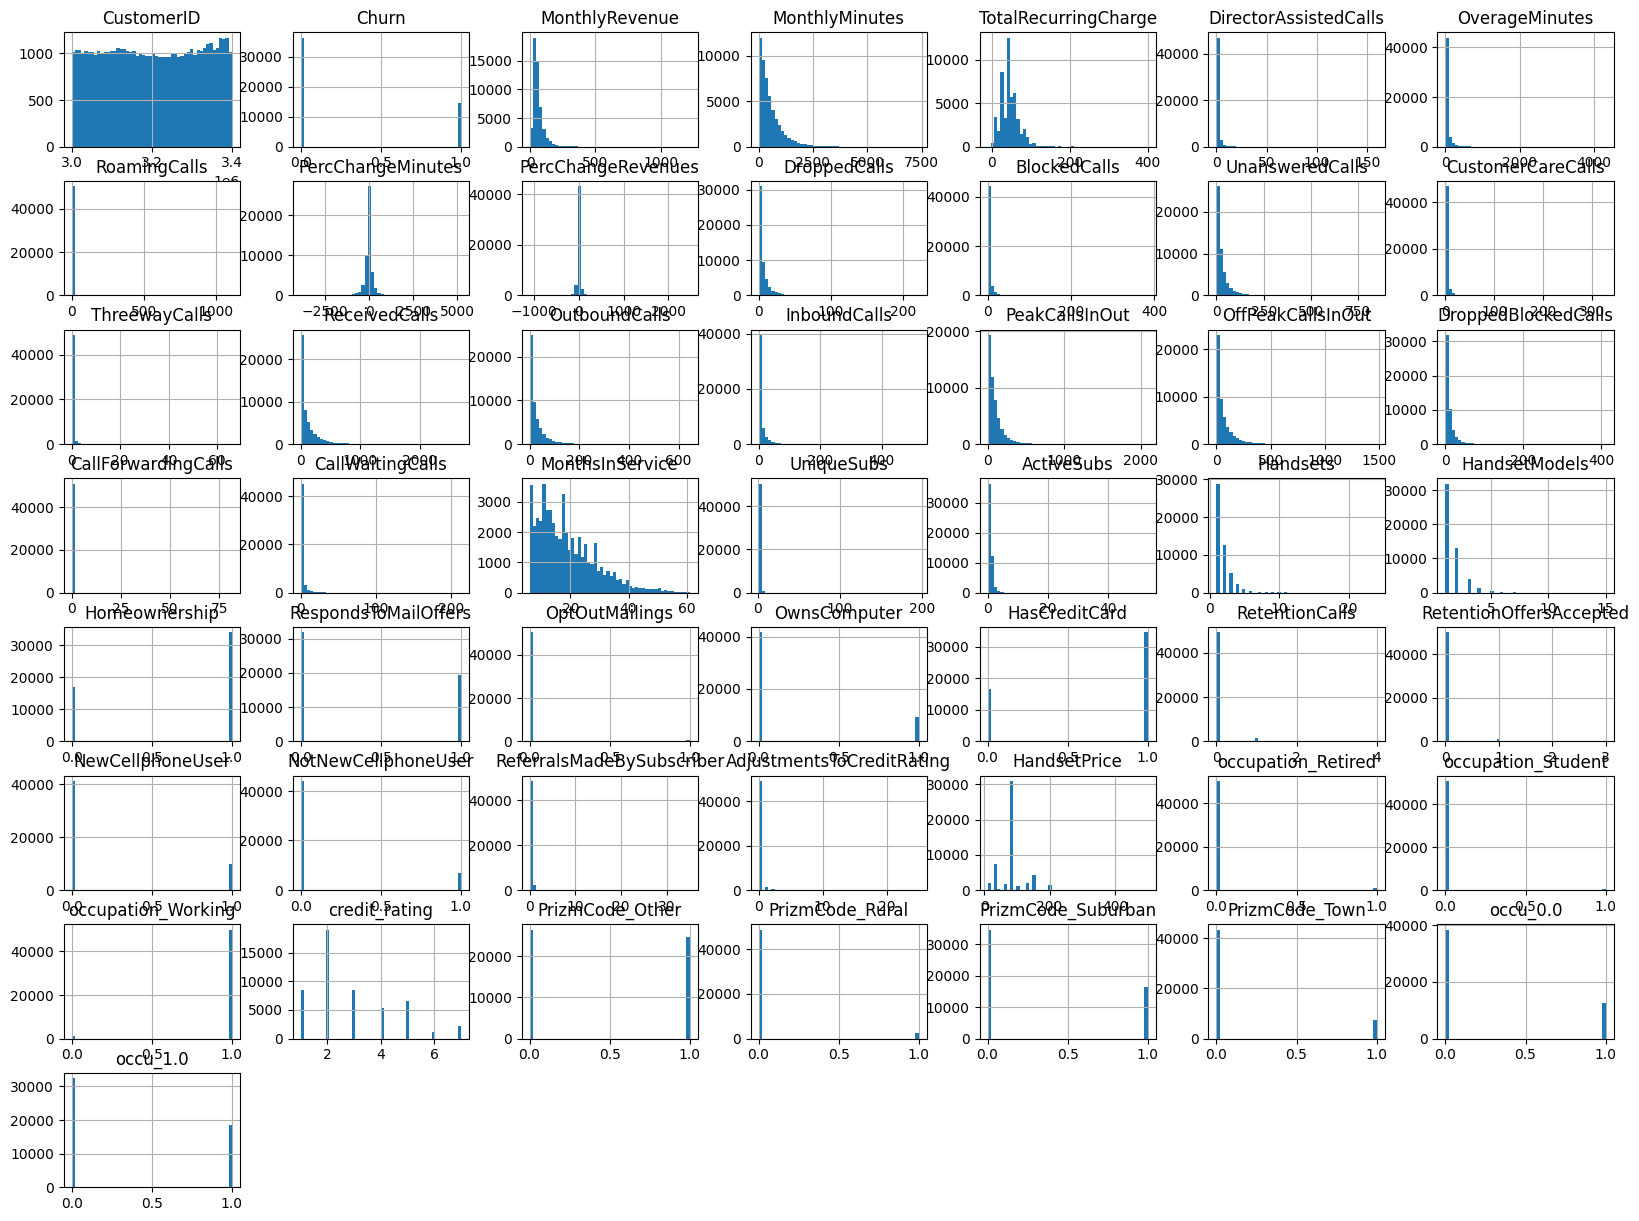

In [ ]:
train.hist(figsize=(20,15), bins=50)

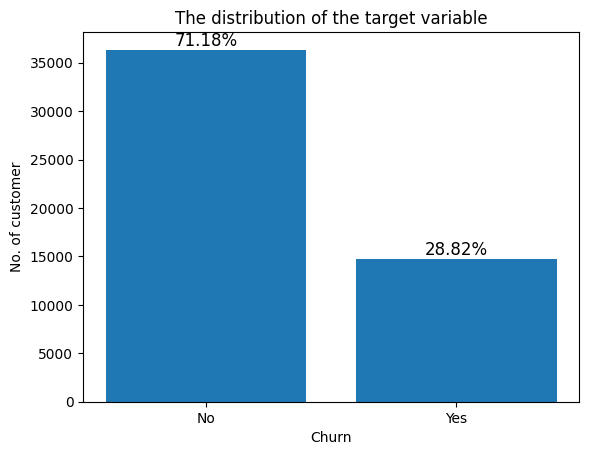

In [ ]:
#the bar chart show the distribution of our target variable which 71% of customers decided not to leave ​
churn_counts = train['Churn'].value_counts()
total_samples = len(train)

plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel("Churn")
plt.ylabel("No. of customer")
plt.title("The distribution of the target variable")
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate bars with percentage values
for i, count in enumerate(churn_counts.values):
    percentage = (count / total_samples) * 100
    plt.text(churn_counts.index[i], count, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=12)

plt.show()


#**Imputation**
Imputation involves replacing missing values with estimated or calculated values in order to make the dataset complete and suitable for analysis or modeling. In this case we use mean strategy. ​

In [ ]:
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' instead of 'mean'
numeric_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
                   'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'Handsets', 'HandsetModels']
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# **Correlation Analysis**

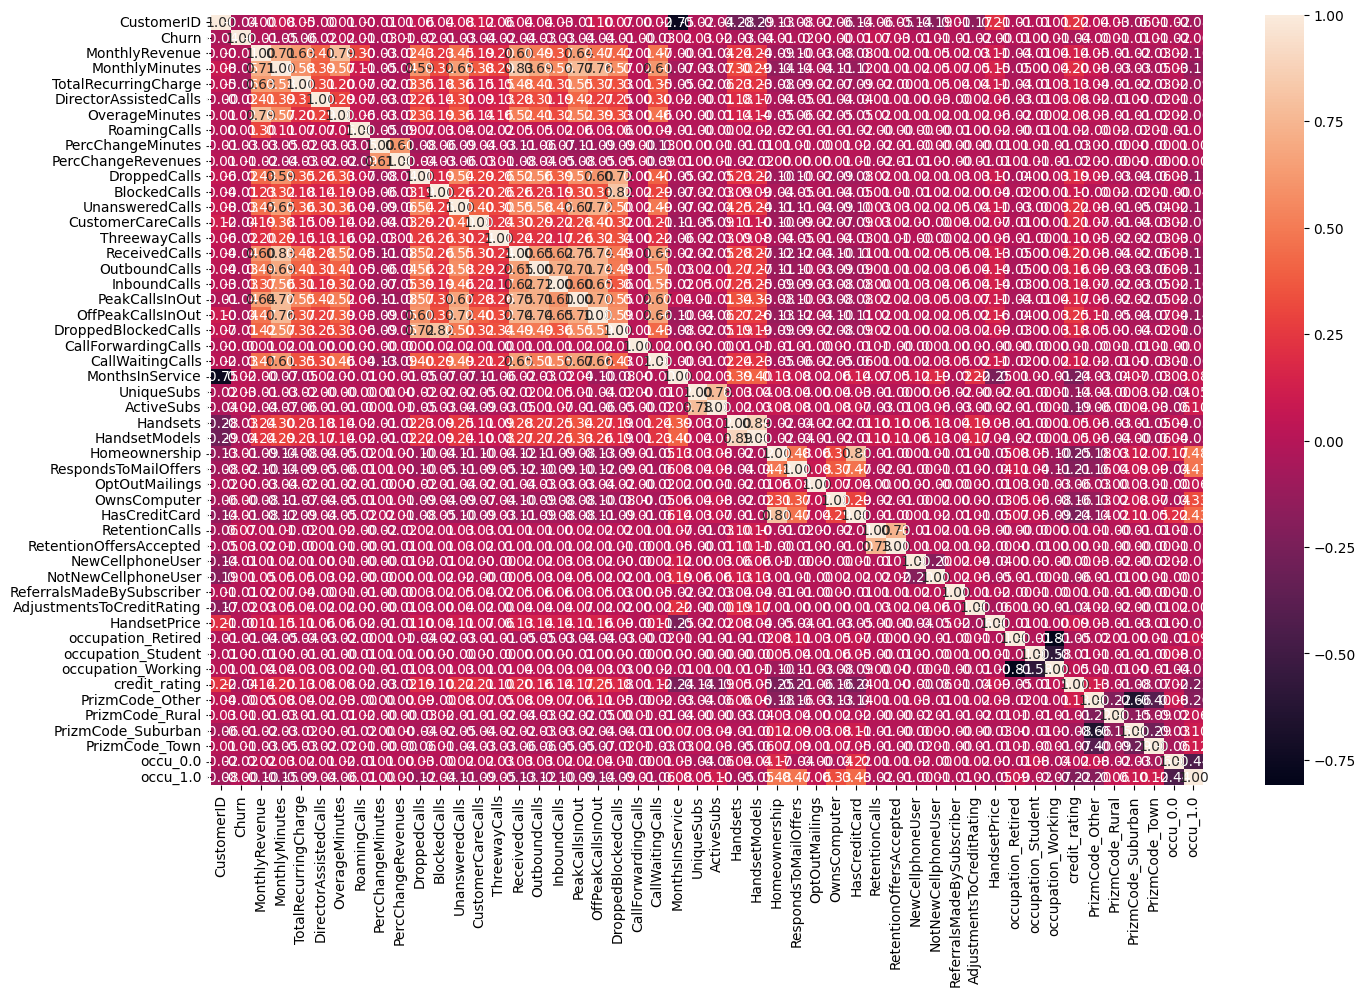

In [ ]:
# Correlation
# see the heatmap for correlation
corr = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()


'''
Highly Correlated Features:
- Overage Minutes - Monthly Revenue : 0.83
- Received Calls - Monthly Minutes : 0.79
- Dropped Blocked Called - Blocked Called : 0.82

- Handsets - Handset Models : 0.89

'''

In [ ]:
na_counts = train.isna().sum()
print(na_counts)

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
Homeownership                0
RespondsToMailOffers         0
OptOutMailings               0
OwnsComputer                 0
HasCredi

#**VIF**

In [ ]:
#Making function to calculate variance inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#Creating copy of dataset and dropping customer ID
train2 = train.drop("CustomerID", axis=1)

calc_vif(train2)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Churn,1.022481
1,MonthlyRevenue,11.081153
2,MonthlyMinutes,6.156964
3,TotalRecurringCharge,4.089939
4,DirectorAssistedCalls,1.342032
5,OverageMinutes,6.588045
6,RoamingCalls,1.597291
7,PercChangeMinutes,1.634869
8,PercChangeRevenues,1.622003
9,DroppedCalls,91.834190


In [ ]:
#Dropped Blocked Calls, Overage Minutes, Blocked Calls, Monthly Revenue, and Monthly Minutes.
#Let's see what will happen if we dropped Dropped Blocked Calls and Overage Minutes. These features are also highly correlated features.

#Dropping Features
train2 = train.drop(["CustomerID","DroppedBlockedCalls","OverageMinutes"], axis=1)

calc_vif(train2)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Churn,1.022339
1,MonthlyRevenue,2.951174
2,MonthlyMinutes,6.024421
3,TotalRecurringCharge,1.915662
4,DirectorAssistedCalls,1.323922
5,RoamingCalls,1.185840
6,PercChangeMinutes,1.633149
7,PercChangeRevenues,1.614689
8,DroppedCalls,1.843479
9,BlockedCalls,1.210568


After dropping Dropped Blocked Calls and Overage Minutes, Monthly Revenue and Blocked Calls scored VIFs within 1 and 5.

Although Monthly Minutes is still more than 5, the group deemed the feature important since the dataset is about a telecom company.



VIF = 1: This indicates no multicollinearity between the variable and other variables in the dataset. This is an ideal scenario.

VIF > 1 and < 5: VIF values in this range are generally considered acceptable. It suggests that there might be some correlation between the variable and other variables, but it's not significant enough to cause major problems in the regression analysis.

VIF >= 5: VIF values above 5 indicate high multicollinearity. It suggests that the variable is highly correlated with other variables in the dataset, and this might lead to unstable and unreliable coefficient estimates in a regression analysis.

# **Fitting the Model**

In [ ]:
#Creating variable with only Churn data
response = train2["Churn"]

#Creating a dataset without Churn data. Dataset already dropped features from feature selection
dataset = train2.drop(columns="Churn")

In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (40837, 46)
Number transactions y_train dataset:  (40837,)
Number transactions X_test dataset:  (10210, 46)
Number transactions y_test dataset:  (10210,)


In [ ]:
# K- Fold Cross Validation Check

#Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics

#SVM was initially considered but was dropped later on due to how computationally expensive it was.


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results:


acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


KeyboardInterrupt: ignored

K Fold Cross Validation Results show that Random Forest has the highest ROC AUC and Accuracy mean with the lowest standard deviation for both metrics.

In [ ]:
# Test Set Evaluation Check

#Logistic Regression-----------------

t0 = time.time()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

t1 = time.time()
print("Logistic Regression: Took %0.2f seconds" % (t1 - t0))
#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])


#Step 15.4.3. K-Nearest Neighbours------------------------


# Fitting KNN to the Training set:
t0 = time.time()

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred  = classifier.predict(X_test)

t1 = time.time()
print("KNN Took %0.2f seconds" % (t1 - t0))

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



#Step 15.4.5.  Naive Byes------------------------------------------------

# Fitting Naive Byes to the Training set:
t0 = time.time()

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

t1 = time.time()
print("Naive Byes Took %0.2f seconds" % (t1 - t0))

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Gaussian NB', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



#Step 15.4.6. Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:
t0 = time.time()

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

t1 = time.time()
print("Decision Tree: Took %0.2f seconds" % (t1 - t0))

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
t0 = time.time()

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


In [ ]:
print(results.sort_values(by='Accuracy',ascending=False))

Although Logistic Regression had the highest accuracy and lowest computation time, Random Forest was selected due to its better performance overall.

For businesses, it is more expensive to attain a new customer, rather than retain an old customer. Hence, Recall was chosen as one of the determinants since it considers False Negatives.

Random Forest produced one of the highest accuracies among the models, while Recall is higher than Logistic Regression.

# **Hyperparameter Tuning**

For the hyper parameter tuning, we used the Randomized Search Cross-Validation.
This is a technique that search through a specified range of hyperparameters in a random manner while performing cross-validation to evaluate the model's performance.
This approach is more efficient than exhaustive grid search because it doesn't evaluate all possible combinations of hyperparameters but instead samples a specified number of random combinations.


In [ ]:
#Identify optimal number of trees for Random Forest Model:

score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()



In [ ]:
#setting the value ranges for the parameter grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(40, 60, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', 0.5, 0.7]

# Maximum number of levels in tree
max_depth = [None, 10, 20, 30]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

For the RandomizedSearchCV, we ran 4 iterations of 10, 25, 50 and 75 to see the different best parameter combinations. Iteration 50 and 75 came up with the same parameters so we decided to stop at 75.


In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create RandomizedSearchCV with the defined random grid and other settings
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                   n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the RandomizedSearchCV on your data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

We run the model using the different parameters from different iterations to see the if the performance improved and compare the results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score

# Initialize the Random Forest model with best hyperparameters
classifier = RandomForestClassifier(n_estimators=40, min_samples_split=20, min_samples_leaf=2,
                                    max_depth=None, bootstrap=False)

# Train the model on your training data
classifier.fit(X_train, y_train)  # X_train is your training data features, y_train is your training data labels


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

# Create a DataFrame to store the results
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
                              columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print(model_results)

Based on the results, parameters given by 50 & 75 gave the best results with reasonable computational time of 6 seconds, due to less n_estimators. If we observed closely, the difference in the results are not that significant compared for iteration 10 and iteration 50 parameters.  

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [ ]:
#AUC ROC Curve
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

For this model, The Area Under the ROC Curve is 0.72
This results of 0.72 suggests that our model has a moderate ability to differentiate between positive and negative instances. It means that the model is capturing some of the underlying patterns in the data, but there is still room for improvement.
